In [1]:
import tensorflow as tf
import numpy as np
import time

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
model_file = "logdir/1526420360/eightbit.pb"

In [3]:
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
data = mnist.test.images # Returns np.array
labels = np.asarray(mnist.test.labels, dtype=np.int32)

Instructions for updating:
Please use tf.data.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
def load_graph(model_file):
    graph = tf.Graph()
    graph_def = tf.GraphDef()

    with open(model_file, "rb") as f:
        graph_def.ParseFromString(f.read())
    with graph.as_default():
        tf.import_graph_def(graph_def)

    return graph

In [5]:
graph = load_graph(model_file)

In [6]:
print(labels)

[7 2 1 ... 4 5 6]


ValueError: Cannot feed value of shape (784,) for Tensor u'import/Placeholder:0', which has shape '(?, 784)'

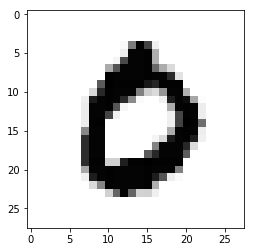

In [7]:
t = data[3]

# Evaluate a sample image and display it
import matplotlib.pyplot as plt

%matplotlib inline

# To interpret the values as a 28x28 image, we need to reshape
# the numpy array, which is one dimensional.
plt.imshow(t.reshape(28, 28), cmap=plt.cm.Greys);

input_name = "import/Placeholder"
output_name = "import/final_result"

input_operation = graph.get_operation_by_name(input_name);
output_operation = graph.get_operation_by_name(output_name);

with tf.Session(graph=graph) as sess:
    start = time.time()
    results = sess.run(output_operation.outputs[0],
                  {input_operation.outputs[0]: t})
    
    end=time.time()
results = np.squeeze(results)

top_k = results.argsort()[-5:][::-1]

print('\nEvaluation time (1-image): {:.3f}s\n'.format(end-start))

for i in top_k:
    print(i, results[i])

In [12]:
t = data[3:7]
t = np.reshape(t,[-1,784])

# Evaluate a sample image and display it
import matplotlib.pyplot as plt

%matplotlib inline

# To interpret the values as a 28x28 image, we need to reshape
# the numpy array, which is one dimensional.
#plt.imshow(t.reshape(28, 28), cmap=plt.cm.Greys);

input_name = "import/Placeholder"
output_name = "import/final_result"

input_operation = graph.get_operation_by_name(input_name);
output_operation = graph.get_operation_by_name(output_name);

with tf.Session(graph=graph) as sess:
    start = time.time()
    results = sess.run(output_operation.outputs[0],
                  {input_operation.outputs[0]: t})
    
    end=time.time()
results = np.squeeze(results)

top_k = results.argsort()[-5:][::-1]

print('\nEvaluation time (1-image): {:.3f}s\n'.format(end-start))

print(results)



Evaluation time (1-image): 0.043s

[[9.99636889e-01 5.23360697e-08 1.26279192e-04 1.17320360e-05
  4.04978550e-07 1.03594255e-04 5.35402323e-05 5.01204267e-05
  1.02034960e-06 1.63192744e-05]
 [5.64093207e-05 6.38834763e-06 3.35212128e-04 4.94333290e-05
  9.85933840e-01 1.42124292e-04 4.36497736e-04 8.44572962e-04
  3.58084275e-04 1.18374471e-02]
 [3.82456419e-05 9.93280470e-01 1.34037560e-04 4.11661837e-04
  3.16139194e-04 2.74950453e-05 5.31997357e-05 5.05626993e-03
  4.69755207e-04 2.12757761e-04]
 [6.32758940e-07 8.30220688e-06 1.31780780e-05 6.86262065e-05
  9.83989418e-01 1.63092895e-03 3.32024028e-05 2.12372001e-03
  7.44289998e-03 4.68903268e-03]]


In [16]:
import tensorflow as tf
import numpy as np
import time

t = [0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.04313726,
       0.5882353 , 0.9921569 , 0.79215693, 0.12156864, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.14509805, 0.9843138 , 0.9843138 ,
       0.9921569 , 0.41960788, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.08235294,
       0.7725491 , 0.9843138 , 0.9843138 , 0.9921569 , 0.41960788,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.43137258, 0.74509805, 0.9843138 , 0.9843138 ,
       0.9843138 , 0.9921569 , 0.6627451 , 0.427451  , 0.24313727,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.9921569 ,
       0.9843138 , 0.9843138 , 0.9843138 , 0.9843138 , 0.9921569 ,
       0.9843138 , 0.9843138 , 0.86274517, 0.20000002, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.7137255 , 1.        , 0.9921569 , 0.9921569 ,
       0.9921569 , 0.9921569 , 0.9176471 , 0.8705883 , 0.9921569 ,
       0.9921569 , 0.9921569 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.24705884, 0.86666673,
       0.9921569 , 0.9843138 , 0.9843138 , 0.9843138 , 0.5764706 ,
       0.3019608 , 0.24313727, 0.5019608 , 0.9843138 , 0.9843138 ,
       0.41176474, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.1254902 , 0.9058824 , 0.9843138 , 0.9921569 , 0.9843138 ,
       0.86274517, 0.5372549 , 0.03921569, 0.        , 0.        ,
       0.12156864, 0.90196085, 0.9843138 , 0.95294124, 0.4431373 ,
       0.01960784, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.14509805, 0.9843138 ,
       0.9843138 , 0.9921569 , 0.7372549 , 0.07843138, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.427451  ,
       0.9843138 , 0.9921569 , 0.9843138 , 0.13725491, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.14509805, 0.9843138 , 0.9843138 , 0.78823537,
       0.11764707, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.12156864, 0.7843138 , 0.9921569 ,
       0.9843138 , 0.13725491, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.14509805,
       0.9921569 , 0.9921569 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.1254902 , 0.79215693, 1.        , 0.9921569 , 0.6431373 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.54901963, 0.9843138 , 0.9843138 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.427451  , 0.9843138 ,
       0.9921569 , 0.9843138 , 0.13725491, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.85098046, 0.9843138 , 0.9843138 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.08235294,
       0.24705884, 0.9058824 , 0.9843138 , 0.9921569 , 0.90196085,
       0.11764707, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.85098046, 0.9843138 ,
       0.9843138 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.5647059 , 0.9843138 , 0.9843138 ,
       0.9843138 , 0.86666673, 0.2392157 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.85098046, 0.9843138 , 0.9843138 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.7137255 ,
       0.86666673, 0.9843138 , 0.9843138 , 0.9843138 , 0.7058824 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.854902  ,
       0.9921569 , 0.9921569 , 0.28627452, 0.28627452, 0.8941177 ,
       0.9921569 , 0.9921569 , 1.        , 0.9921569 , 0.9921569 ,
       0.9921569 , 0.9921569 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.4431373 , 0.9843138 , 0.9843138 ,
       0.9921569 , 0.9843138 , 0.9843138 , 0.9843138 , 0.9843138 ,
       0.9921569 , 0.9843138 , 0.9843138 , 0.9843138 , 0.5764706 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.12156864, 0.90196085, 0.9843138 , 0.9921569 , 0.9843138 ,
       0.9843138 , 0.9843138 , 0.9843138 , 0.9921569 , 0.90196085,
       0.7411765 , 0.13725491, 0.03921569, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.24313727,
       0.5568628 , 0.9921569 , 0.9843138 , 0.9843138 , 0.9843138 ,
       0.9843138 , 0.9921569 , 0.41960788, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.28235295,
       0.68235296, 0.9843138 , 0.6784314 , 0.2784314 , 0.28235295,
       0.11764707, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ]
             

model_file = "logdir/1526420360/eightbit.pb"

def load_graph(model_file):
    graph = tf.Graph()
    graph_def = tf.GraphDef()

    with open(model_file, "rb") as f:
        graph_def.ParseFromString(f.read())
    with graph.as_default():
        tf.import_graph_def(graph_def)

    return graph

graph = load_graph(model_file)

input_name = "import/Placeholder"
output_name = "import/final_result"

input_operation = graph.get_operation_by_name(input_name);
output_operation = graph.get_operation_by_name(output_name);

with tf.Session(graph=graph) as sess:
    start = time.time()
    results = sess.run(output_operation.outputs[0],
                  {input_operation.outputs[0]: t})
    
    end=time.time()
results = np.squeeze(results)

print(results)

In [13]:
data[3]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     